In [12]:
import pandas as pd
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
import np

In [22]:
re_SSH = pd.read_csv("../trial_queries/RE_SSH.txt", sep="\t")
re_SSH = re_SSH.fillna("")
re_SSH.columns

Index(['PT', 'AU', 'BA', 'BE', 'GP', 'AF', 'BF', 'CA', 'TI', 'SO', 'SE', 'BS',
       'LA', 'DT', 'CT', 'CY', 'CL', 'SP', 'HO', 'DE', 'ID', 'AB', 'C1', 'RP',
       'EM', 'RI', 'OI', 'FU', 'FX', 'CR', 'NR', 'TC', 'Z9', 'U1', 'U2', 'PU',
       'PI', 'PA', 'SN', 'EI', 'BN', 'J9', 'JI', 'PD', 'PY', 'VL', 'IS', 'PN',
       'SU', 'SI', 'MA', 'BP', 'EP', 'AR', 'DI', 'D2', 'EA', 'PG', 'WC', 'SC',
       'GA', 'UT', 'PM', 'OA', 'HC', 'HP', 'DA'],
      dtype='object')

In [23]:
re_SSH["HO"].head()

J    economic growth; education; greenhouse gas emi...
J    Construction industry; curriculum; gender diff...
J                                                     
J    Africa; Renewable energy; Simultaneous equatio...
J    Solar energy; Wind energy; Renewable energy re...
Name: HO, dtype: object

In [54]:
all_keywords = [x.lower() for x in re_SSH["DE"] + re_SSH["HO"]]
all_keywords[1:10]

['construction industry; curriculum; gender differences; nigeria; sustainability literacy',
 'economic-growth; causal relationship; fresh-evidence; consumption; policy; emissions',
 'economic-growth evidence; unit-root tests; co2 emissions; environmental degradation; carbon emissions; resource curse; panel-data; consumption; trade; incomeafrica; renewable energy; simultaneous equation models; sustainable development',
 'solar energy; wind energy; renewable energy resources; renewable energy capacity; renewable energy projects',
 'environmental kuznets curve; nonrenewable energy; co2 emissions; financial development; dioxide emissions; renewable energy; regime type; degradation; growth; hypothesisenergy consumption; carbon dioxide emissions; geopolitical risk; economic growth; economic policy uncertainty',
 'decision-making; handling uncertainty; preference; simulation; optimism; impactmulti-criteria decision-making; analytical hierarchy process; uncertainty; xor logic; optimism; pessim

In [81]:
all_keywords_alt = []
for i in re_SSH["DE"] + re_SSH["HO"]:
    all_keywords_alt.extend(i.lower().split(";"))
all_keywords_alt = [x.strip() for x in all_keywords_alt]

import collections
all_keywords_alt_freq = collections.Counter(all_keywords_alt)

In [68]:
cv = CountVectorizer(ngram_range = (2,2)).fit(all_keywords)
print("Keywords:\n{}".format(cv.get_feature_names()))
# Ok, that's a lot


Keywords:
['8211 output', 'aboveground biomass', 'absorbers water', 'absorption reflexion', 'absorption spectra', 'abundant policies', 'acceptance community', 'acceptance green', 'acceptance model', 'acceptance politicsenergy', 'acceptance renewable', 'acceptance responses', 'acceptance united', 'acceptancerenewable energy', 'access control', 'access electricity', 'access electrification', 'access energy', 'access ghana', 'access improved', 'access partnerships', 'access policyenergy', 'access renewable', 'access to', 'accessinnovation system', 'accounting resource', 'acetate ethanol', 'acetic acid', 'acid dissolution', 'acid fermentation', 'acid temperature', 'acquisition system', 'action technology', 'activities renewable', 'activity negative', 'actors sub', 'added gmm', 'added products', 'added service', 'addition fruits', 'adiabatic entropy', 'adjustmentrenewable energy', 'adoption attitude', 'adoption attitudes', 'adoption barriers', 'adoption capacity', 'adoption date', 'adoption

In [44]:
feature_names = np.array(cv.get_feature_names)

array(<bound method CountVectorizer.get_feature_names of CountVectorizer(ngram_range=(2, 2))>,
      dtype=object)

In [56]:
cv_freq = cv.vocabulary_
{k: v for k, v in sorted(cv_freq.items(), key=lambda item: item[1], reverse=True)}

{'zone socio': 4349,
 'zone belt': 4348,
 'znonanostructured composites': 4347,
 'zeolite heterogeneous': 4346,
 'zambezimozambique africa': 4345,
 'yield transesterification': 4344,
 'yield absorption': 4343,
 'yeast pretreatment': 4342,
 'yeast butanol': 4341,
 'years belt': 4340,
 'year undergraduate': 4339,
 'year tmy2': 4338,
 'year building': 4337,
 'yam peel': 4336,
 'xor logic': 4335,
 'wt hybrid': 4334,
 'wound asynchronous': 4333,
 'work institutionalization': 4332,
 'wood pretreatment': 4331,
 'women entrepreneurs': 4330,
 'women business': 4329,
 'witwatersrand basin': 4328,
 'with structural': 4327,
 'with breakpoint': 4326,
 'wing hydrokinetic': 4325,
 'windimplementation capacity': 4324,
 'windenergy electrical': 4323,
 'wind turbines': 4322,
 'wind turbine': 4321,
 'wind technologies': 4320,
 'wind system': 4319,
 'wind strategies': 4318,
 'wind solar': 4317,
 'wind pv': 4316,
 'wind power': 4315,
 'wind potential': 4314,
 'wind industry': 4313,
 'wind hybrid': 4312,
 '

In [57]:
len(cv_freq)

4350

In [66]:
pd.DataFrame.from_dict(cv_freq.items()).to_csv("cv_freq.csv")

In [71]:
all_keywords

['economic-growth; energy-consumption; co2 emissions; electricity consumption; labor productivity; renewable energy; air-pollution; oil price; specification; agricultureeconomic growth; education; greenhouse gas emission; health; panel estimations; sustainable development',
 'construction industry; curriculum; gender differences; nigeria; sustainability literacy',
 'economic-growth; causal relationship; fresh-evidence; consumption; policy; emissions',
 'economic-growth evidence; unit-root tests; co2 emissions; environmental degradation; carbon emissions; resource curse; panel-data; consumption; trade; incomeafrica; renewable energy; simultaneous equation models; sustainable development',
 'solar energy; wind energy; renewable energy resources; renewable energy capacity; renewable energy projects',
 'environmental kuznets curve; nonrenewable energy; co2 emissions; financial development; dioxide emissions; renewable energy; regime type; degradation; growth; hypothesisenergy consumption; 

In [88]:
pd.DataFrame.from_dict({k: v for k, v in sorted(dict(all_keywords_alt_freq).items(), key=lambda item: item[1], reverse=True)}.items()).to_csv("all_keywords_alt_freq.csv")

In [93]:
import random
set(random.sample(range(1, 97412), 50))

{1552,
 4938,
 8712,
 9012,
 10302,
 11878,
 12759,
 12969,
 13269,
 14238,
 16757,
 16930,
 18919,
 20260,
 20276,
 22372,
 24943,
 26435,
 28244,
 29507,
 31605,
 32408,
 33918,
 37475,
 43784,
 45593,
 47652,
 47742,
 48103,
 50532,
 53042,
 57774,
 58990,
 60243,
 62496,
 62646,
 65935,
 70746,
 72528,
 72675,
 79603,
 83667,
 86297,
 88972,
 89622,
 91816,
 93625,
 94608,
 94942,
 97016}

In [97]:
eq_ra = pd.read_csv("../trial_queries/early_query_RA.txt", sep="\t").iloc[:-1,:]
eq_ra

,Research Areas,records,% of 56379
0,ENGINEERING,14888.0,26.407
1,ENERGY FUELS,10582.0,18.769
2,ENVIRONMENTAL SCIENCES ECOLOGY,9480.0,16.815
3,SCIENCE TECHNOLOGY OTHER TOPICS,7440.0,13.196
4,CHEMISTRY,6956.0,12.338
...,...,...,...
142,FILM RADIO TELEVISION,2.0,0.004
143,SUBSTANCE ABUSE,2.0,0.004
144,AUDIOLOGY SPEECH LANGUAGE PATHOLOGY,1.0,0.002
145,MEDICAL ETHICS,1.0,0.002


In [100]:
def match_ra(research_fields, research_area_df, ra_col_name="Research Areas"):
    lvl1 = [0] * len(research_fields[ra_col_name])
    for i,x in enumerate(research_fields[ra_col_name]):
        for j in range(len(research_area_df.columns)):
            for k,y in enumerate(research_area_df.iloc[:, j]):
                if re.sub(r'[^\w\s]','',x.lower()).strip().replace(" ","") == re.sub(r'[^\w\s]','',str(y).lower()).strip().replace(" ", ""):
                    lvl1[i] = research_area_df.columns[j]
    return lvl1

In [103]:
eq_ra

,Research Areas,records,% of 56379
0,ENGINEERING,14888.0,26.407
1,ENERGY FUELS,10582.0,18.769
2,ENVIRONMENTAL SCIENCES ECOLOGY,9480.0,16.815
3,SCIENCE TECHNOLOGY OTHER TOPICS,7440.0,13.196
4,CHEMISTRY,6956.0,12.338
...,...,...,...
142,FILM RADIO TELEVISION,2.0,0.004
143,SUBSTANCE ABUSE,2.0,0.004
144,AUDIOLOGY SPEECH LANGUAGE PATHOLOGY,1.0,0.002
145,MEDICAL ETHICS,1.0,0.002


In [102]:
research_domains = pd.read_csv('../../../knoc/88_supplementary/wos_categories.csv', sep=',')

In [108]:
import re
eq_ra["research_domains"] = match_ra(eq_ra, research_domains)
eq_ra["research_domains"][3] = "Technology "

<ipython-input-108-ed4de1fa649b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eq_ra["research_domains"][3] = "Technology "


In [109]:
eq_ra

,Research Areas,records,% of 56379,research_domains
0,ENGINEERING,14888.0,26.407,Technology
1,ENERGY FUELS,10582.0,18.769,Technology
2,ENVIRONMENTAL SCIENCES ECOLOGY,9480.0,16.815,Life Sciences & Biomedicine
3,SCIENCE TECHNOLOGY OTHER TOPICS,7440.0,13.196,Technology
4,CHEMISTRY,6956.0,12.338,Physical Sciences
...,...,...,...,...
142,FILM RADIO TELEVISION,2.0,0.004,Arts & Humanities
143,SUBSTANCE ABUSE,2.0,0.004,Life Sciences & Biomedicine
144,AUDIOLOGY SPEECH LANGUAGE PATHOLOGY,1.0,0.002,Life Sciences & Biomedicine
145,MEDICAL ETHICS,1.0,0.002,Life Sciences & Biomedicine


In [119]:
import seaborn as sns
from matplotlib import pyplot as plt

In [111]:
eq_ra_freq = eq_ra.groupby("research_domains")["records"].sum()
eq_ra_freq = pd.DataFrame(eq_ra_freq)
eq_ra_freq = eq_ra_freq.rename_axis("research_domains").reset_index()

In [112]:
eq_ra_freq

,research_domains,records
0,Arts & Humanities,192.0
1,Life Sciences & Biomedicine,26564.0
2,Physical Sciences,20003.0
3,Social Sciences,3193.0
4,Technology,45893.0


[Text(0.5, 0, 'Research Domains'), Text(0, 0.5, '# of publications')]

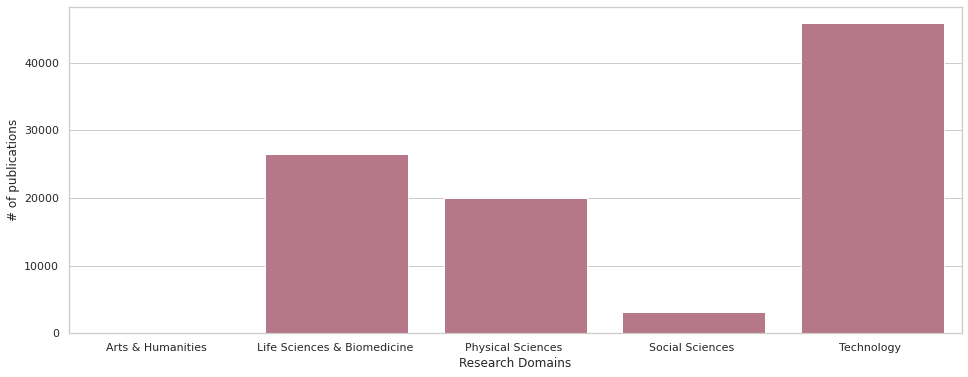

In [121]:
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize=(16, 6))
sns.barplot(x="research_domains", y="records", color="#c06c84", data=eq_ra_freq).set(xlabel='Research Domains', ylabel='# of publications')